In [186]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from scipy.integrate import quad
#from astropy.cosmology import Planck15   # You can choose a different cosmology if needed
import astropy.units as u
from astropy import constants as const
from astropy.cosmology import FlatLambdaCDM

In [187]:
def lx_func(func, fixed_value):
    def f(x):
        return func(fixed_value, x)
    return f

def z_func(func, fixed_value):
    def f(x):
        
        return func(x,fixed_value)
    return f

In [188]:
def simpsons_integration(func, a, b, n=3000):
    h = (b - a) / n
    s = func(a) + func(b)

    for i in range(1, n, 2):
        s += 4 * func(a + i * h)
    for i in range(2, n, 2):
        s += 2 * func(a + i * h)

    return s * h / 3

In [254]:
import pandas as pd
def Psi_Ueda(Lx):
     return 1/np.log(10)*1/Lx*((Lx/L_star)**(gamma1)+(Lx/L_star)**(gamma2))**(-1) 



def Psi_Ajello(Lx):
    return 1/Lx*(Lx/L_star)**(1-gamma2) #Function from Ajello et al 


def z_star(Lx): #Calc Z_star used for caculation of XLF for RG
    if (Lx < L_c):
        return z_c *(Lx/L_c)**alpha
    else:
        return z_c

def e_z(z,Lx): #Used in calculation of XLF for RG. redshift evolution is of type PDF
    z_s =z_star(Lx)
    if z<=z_s:
        return (1+z)**(v_1)
    else: 
        return e_z(z_s,Lx) *((1+z)/(1+z_s))**(v_2)

def e_z_PL(z): #Used in calculation of XLF for Blazars, BLlac, and FSRQ. redshift evolution is of type PLF
    
    return (1+z)**(v_1 + v_2*z)





H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter (ΩM)
Ode0 = 0.7  # Dark energy density parameter (ΩΛ)

# Create a FlatLambdaCDM cosmology object
cosmo1 = FlatLambdaCDM(H0=H0, Om0=Om0)  # Replace with your desired H0 value



def integrandRG(z, lx): #different integrands, Blazar and FSRQ use the same integrand
   
    
    return (Psi_Ueda(lx)*cosmo1.differential_comoving_volume(z)*e_z(z,lx)).value

def integrandBlazar(z, lx):
   
    return (Psi_Ueda(lx/e_z_PL(z))*cosmo1.differential_comoving_volume(z)).value

def integrandBLlac(z, lx):
 
   
    return (Psi_Ajello(lx/e_z_PL(z))*cosmo1.differential_comoving_volume(z)).value



model_constants = { #Constants for all models, no unit attached yet
    'RG_SLDDE': {
        'A': 10**(-6.077),
        'L_star': 10**(44.33),
        'gamma1':2.15,
        'gamma2':1.10,
        'v1':4,
        'v2':-1.5,
        'z_c': 1.9,
        'Lc':10**(44.6),
        'alpha':   0.317,
        'corr_fac': 1,
        'L_lower':42,
         'L_higher':47,
        'integrand':integrandRG,
        
    },
    'AMPLE_Blazar': {
        'A': 1.379*10**(-7),
        'L_star': 1.81*10**(44),
        'gamma1':-0.87,
        'gamma2':2.73,
        'v1':3.45,
        'v2':-0.25,
        'z_c': 0,
        'Lc':0,
        'alpha':   0,
        'corr_fac': 1,
        'L_lower':44,
         'L_higher':48.5,
        'integrand':integrandBlazar,
        # Add more constants for model 1
    },
     'AMPLE_FSRQ': {
        'A': 0.175*10**(-7),
        'L_star': 2.42*10**(44),
        'gamma1':-50,
        'gamma2':2.49,
        'v1':3.67,
        'v2':-0.30,
        'z_c': 0,
        'Lc':0,
        'alpha':   0,
        'corr_fac': 1,
        'L_lower':46,
         'L_higher':48.5,
        'integrand':integrandBlazar,
        # Add more constants for model 1
    },
     'APLE_BLlac': {
        'A': 0.830*10**(-7),
        'L_star': 1*10**(44),
        'gamma1':0,
        'gamma2':2.61,
        'v1':-0.79,
        'v2':0,
        'z_c': 0,
        'Lc':0,
        'alpha':   0,
        'corr_fac': 1,
         'L_lower':44.5,
         'L_higher':48.5,
         'integrand':integrandBLlac,
        # Add more constants for model 1
    },}

    # Define the data for the table
data = {
'Model': ['RG\_SLDDE', 'AMPLE\_Blazar', 'AMPLE\_FSRQ', 'APLE\_BLlac'],
'A': [f"{model_constants[m]['A']:.3e}" if model_constants[m]['A'] != 0 else '' for m in model_constants],
'L\_star': [f"{model_constants[m]['L_star']:.3e}" if model_constants[m]['L_star'] != 0 else '' for m in model_constants],
r'$\gamma_1$': [f"{model_constants[m]['gamma1']:.2f}" if model_constants[m]['gamma1'] != 0 else '' for m in model_constants],
r'$\gamma_2$': [f"{model_constants[m]['gamma2']:.2f}" if model_constants[m]['gamma2'] != 0 else '' for m in model_constants],
r'$v_1$': [f"{model_constants[m]['v1']:.2f}" if model_constants[m]['v1'] != 0 else '' for m in model_constants],
r'$v_2$': [f"{model_constants[m]['v2']:.2f}" if model_constants[m]['v2'] != 0 else '' for m in model_constants],
r'$z_c$': [f"{model_constants[m]['z_c']:.2f}" if model_constants[m]['z_c'] != 0 else '' for m in model_constants],
r'$L_c$': [f"{model_constants[m]['Lc']:.3e}" if model_constants[m]['Lc'] != 0 else '' for m in model_constants],
r'$\alpha$': [f"{model_constants[m]['alpha']:.3f}" if model_constants[m]['alpha'] != 0 else '' for m in model_constants],
'corr\_fac': [f"{model_constants[m]['corr_fac']:.0f}" if model_constants[m]['corr_fac'] != 0 else '' for m in model_constants],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame as a LaTeX table
print(df.to_latex(index=False))


selected_model = 'APLE_BLlac'
#different models 'RG_SLDDE', 'AMPLE_Blazar', 'AMPLE_FSRQ', 'APLE_BLlac'


# Access constants for the selected model and giving all constants their unit
constants = model_constants[selected_model]

A = constants['A']
L_star = constants['L_star']
gamma1 = constants['gamma1']
gamma2 = constants['gamma2']
v_1 = constants['v1']
v_2 = constants['v2']
z_c = constants['z_c']
L_c = constants['Lc']
alpha =constants['alpha']
corr_fac = constants['corr_fac']

N_steps = 30
L_x  = np.logspace(constants["L_lower"],constants["L_higher"],N_steps)


 
integrand = constants["integrand"]
# Define the limits of integration for 'z'
z_lower = 0.01
z_upper = 2.5

a = np.log10(L_x[-1])-np.log10(L_x[0])
x = L_x/(10.0**(44))# 

# Define the limits of integration for 'Lx', not used since it is not regular steps done in Jacobsen et al
L_x_lower = np.log10(L_x[0])
L_x_upper = np.log10(L_x[0])+a/3
Z_list = np.linspace(0.01,9,N_steps)


\begin{tabular}{lllllllllll}
\toprule
        Model &         A &   L\textbackslash \_star & \$\textbackslash gamma\_1\$ & \$\textbackslash gamma\_2\$ & \$v\_1\$ & \$v\_2\$ & \$z\_c\$ &     \$L\_c\$ & \$\textbackslash alpha\$ & corr\textbackslash \_fac \\
\midrule
    RG\textbackslash \_SLDDE & 8.375e-07 & 2.138e+44 &       2.15 &       1.10 &  4.00 & -1.50 &  1.90 & 3.981e+44 &    0.317 &         1 \\
AMPLE\textbackslash \_Blazar & 1.379e-07 & 1.810e+44 &      -0.87 &       2.73 &  3.45 & -0.25 &       &           &          &         1 \\
  AMPLE\textbackslash \_FSRQ & 1.750e-08 & 2.420e+44 &     -50.00 &       2.49 &  3.67 & -0.30 &       &           &          &         1 \\
  APLE\textbackslash \_BLlac & 8.300e-08 & 1.000e+44 &            &       2.61 & -0.79 &       &       &           &          &         1 \\
\bottomrule
\end{tabular}



C:\Users\henri\AppData\Local\Temp\ipykernel_27632\2724810173.py:142: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [255]:

def prefrom_int(func, list,z_lower,z_upper):

    results = []
    for h in list:
        
        results.append(A*corr_fac*4*np.pi*simpsons_integration(func(integrand,h), z_lower, z_upper))

    return results

 
integral_results_z_1 = prefrom_int(z_func, L_x,z_lower,z_upper)
integral_results_z_1  = np.array(integral_results_z_1)
print("done 1")
integral_results_z_2 =  prefrom_int(z_func, L_x,z_lower+ 2.5,z_upper+2.5)
integral_results_z_2 = np.array(integral_results_z_2)
print("done 2")
integral_results_z_3 = prefrom_int(z_func, L_x,z_lower+5,z_upper+5)
integral_results_z_3 = np.array(integral_results_z_3)
print("done 3")
integral_results_z_4 =  prefrom_int(z_func, L_x,z_lower+7.5,z_upper+7.5)
integral_results_z_4 = np.array(integral_results_z_4)



done 1
done 2
done 3


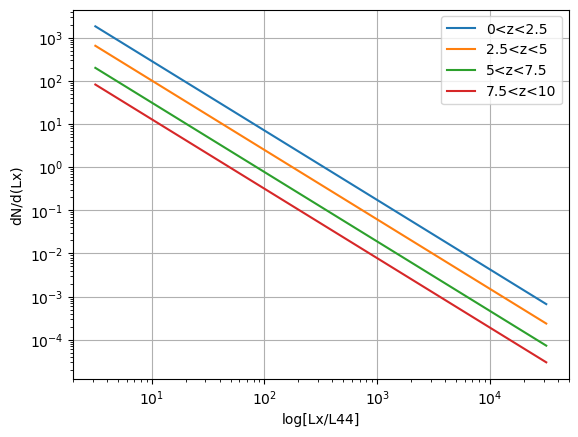

In [256]:
plt.figure(1)
plt.plot(x,L_x*integral_results_z_1,label = "0<z<2.5")
plt.plot(x,L_x*(integral_results_z_2),label = "2.5<z<5")
plt.plot(x,L_x*(integral_results_z_3),label = "5<z<7.5")
plt.plot(x,L_x*(integral_results_z_4),label = "7.5<z<10")
plt.ylabel("dN/d(Lx)")
plt.xlabel("log[Lx/L44]")
#plt.yticks(np.arange(min(integral_results_z_1), max(integral_results_z_4)+1, 1.0))
plt.yscale("log",base =10)
#plt.xlim(0.5)
#plt.ylim(1e1,5e8)
plt.xscale("log",base =10)
plt.title("Luminosity density")
plt.legend()
plt.grid()
plt.show()

In [257]:
 


if (selected_model == "AMPLE_Blazar"):
    a1 = 44
    a2 = 46.5
    a3 = 46.5
    a4 = 47.5
    a5 = 47.5
    a6 = 48.5

    print("AMPLE_Blazar")
elif(selected_model == "RG_SLDDE"):
    a1 = 42
    a2 = 43.5
    a3 = 43.5
    a4 = 45
    a5 = 45
    a6 = 47

    print("RG_SLDDE")

elif(selected_model == "AMPLE_FSRQ"):
    a1 = 46
    a2 = 46.75
    a3 = 46.75
    a4 = 47.5
    a5 = 47.5
    a6 = 48.5
    
    print("AMPLE_FSRQ")
else:
    a1 = 44.5
    a2 = 45.5
    a3 = 45.5
    a4 = 46.5
    a5 = 47.5
    a6 = 48.5
    print("APLE_BLlac")


integral_results_lx1 = prefrom_int(lx_func, Z_list,10**a1,10**a2)
print("done 1")
integral_results_lx2 =   prefrom_int(lx_func, Z_list,10**a3,10**a4)
print("done 2")
integral_results_lx3 =  prefrom_int(lx_func, Z_list,10**a5,10**a6)
print("done 3")
integral_results_lx4 =  prefrom_int(lx_func, Z_list,10**a1,10**a6)

APLE_BLlac
done 1
done 2
done 3


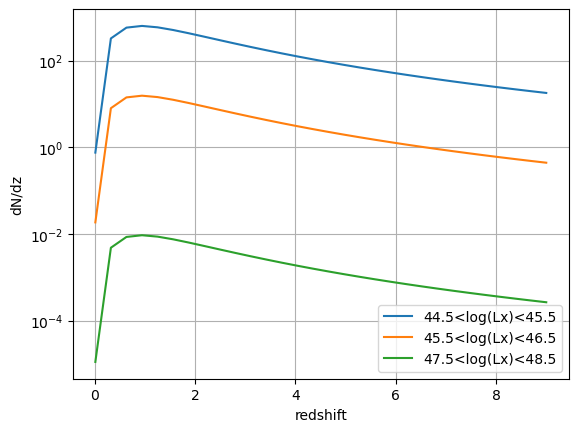

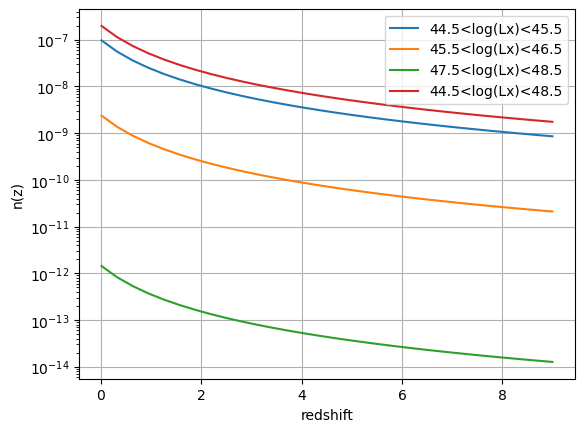

In [258]:

plt.figure(2)
plt.plot(Z_list,(integral_results_lx1),label = f"{a1}<log(Lx)<{a2}")
plt.plot(Z_list,(integral_results_lx2),label = f"{a3}<log(Lx)<{a4}")
plt.plot(Z_list,(integral_results_lx3),label = f"{a5}<log(Lx)<{a6}")
plt.ylabel("dN/dz")
plt.xlabel("redshift")
plt.yscale('log',base=10)
#plt.xscale('log',base=10)
plt.legend()
plt.grid()
plt.show()


n_z_1 =(integral_results_lx1)/cosmo1.differential_comoving_volume(Z_list).value

n_z_2 = (integral_results_lx2)/cosmo1.differential_comoving_volume(Z_list).value
n_z_3 = (integral_results_lx3)/cosmo1.differential_comoving_volume(Z_list).value

n_tot =(integral_results_lx4)/cosmo1.differential_comoving_volume(Z_list).value

plt.figure(2)
plt.plot(Z_list,(integral_results_lx1)/cosmo1.differential_comoving_volume(Z_list).value,label = f"{a1}<log(Lx)<{a2}")
plt.plot(Z_list,(integral_results_lx2)/cosmo1.differential_comoving_volume(Z_list).value,label = f"{a3}<log(Lx)<{a4}")
plt.plot(Z_list,(integral_results_lx3)/cosmo1.differential_comoving_volume(Z_list).value,label = f"{a5}<log(Lx)<{a6}")
plt.plot(Z_list,n_tot,label = f"{a1}<log(Lx)<{a6}")
plt.ylabel("n(z)")
plt.xlabel("redshift")
plt.yscale('log',base=10)
#plt.xscale('log',base=10)
#plt.ylim(10**(-1),10**(9))
#plt.xlim(10**(-2),10**(2))
plt.legend()
plt.grid()
plt.show()

In [259]:
if (selected_model == "AMPLE_Blazar"):

    data = np.loadtxt('plot-data (1)_blazar_ajello.csv', delimiter=',', skiprows=1)
    data = np.loadtxt('plot-data (2).csv', delimiter=',', skiprows=1)
    #data2 = np.loadtxt('plot-data (1)new2.csv', delimiter=',', skiprows=1)

    print(data[:,1])

    integral_results_lx= prefrom_int(lx_func, Z_list,10**47.3, 10**48.3)

    integral_results_lx__2= prefrom_int(lx_func, Z_list,10**46.3, 10**47.3)
    integral_results_lx__3= prefrom_int(lx_func, Z_list,10**43.8, 10**46.3)
    plt.figure(2)
    plt.plot(Z_list,(integral_results_lx)/cosmo1.differential_comoving_volume(Z_list)/4/np.pi,label = f"{47.3}<log(Lx)<{48.3}")
    plt.plot(Z_list,(integral_results_lx__2)/cosmo1.differential_comoving_volume(Z_list)/4/np.pi,label = f"{46.3}<log(Lx)<{ 47.3}")
    plt.plot(Z_list,(integral_results_lx__3)/cosmo1.differential_comoving_volume(Z_list)/4/np.pi,label = f"{43.8}<log(Lx)<{ 46.3}")
    plt.scatter(data[:,0],data[:,1],label = "Ajello points")
    #plt.scatter(data2[:,0],data2[:,1])
    plt.plot()
    plt.ylabel("dN/dz")
    plt.xlabel("redshift")
    plt.yscale('log',base=10)
    #plt.xscale('log',base=10)
    #plt.ylim(10**(-1),10**(9))
    #plt.xlim(10**(-2),10**(2))
    plt.legend()
    plt.grid()
    plt.show()

In [260]:
##Emissivity j(z) of  my population j(z) = |<L(z)>| * n(z). Can start by setting |<L(z)>| = the average of my bin
n_1 = (integral_results_lx1)/cosmo1.differential_comoving_volume(Z_list).value
n_2 = (integral_results_lx2)/cosmo1.differential_comoving_volume(Z_list).value
n_3 = (integral_results_lx3)/cosmo1.differential_comoving_volume(Z_list).value

n_tot =(integral_results_lx4)/cosmo1.differential_comoving_volume(Z_list).value

def em_j_numerator(z,lx):
    return A*lx*integrand(z,lx)

def em_j_denominator(z,lx):
    return A*integrand(z,lx)

def em_j(z, lowerlim, upperlim):
    a = simpsons_integration(lx_func(em_j_numerator,z), lowerlim, upperlim,n=2000)
    b = simpsons_integration(lx_func(em_j_denominator,z), lowerlim, upperlim,n=2000)
    avg_lx = a/b

   
    return avg_lx 

#print(L_x)

em_j1 = []
em_j2 = []
em_j3 = []
em_tot = []
avg_lx1 = []
avg_lx2 = []
avg_lx3 = []
avg_tot = []
for z in Z_list:
    res1 = em_j(z,10**a1,10**a2)
    res2 = em_j(z,10**a3,10**a4)
    res3 = em_j(z,10**a5,10**a6)
    res = em_j(z,10**a1,10**a6)

    em_j1.append(res1 * n_1[Z_list == z])
    em_j2.append(res2 * n_2[Z_list == z])
    em_j3.append(res3 * n_3[Z_list == z])
    em_tot.append(res * (n_tot[Z_list == z]))
    avg_lx1.append(res1)
    avg_lx2.append(res2)
    avg_lx3.append(res3)
    avg_tot.append(res)
  




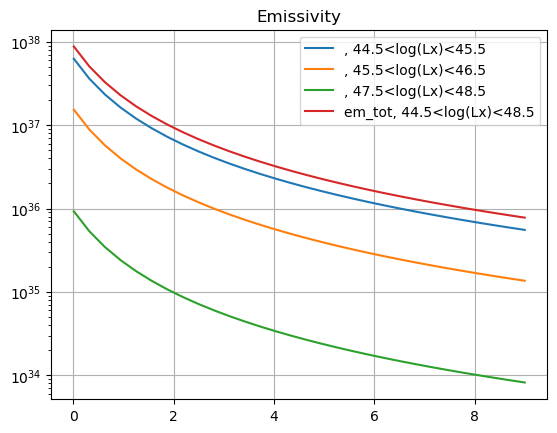

In [261]:
import numpy as np
plt.figure(1)
plt.plot(Z_list, em_j1,label = ", "+ f"{a1}<log(Lx)<{a2}")

plt.plot(Z_list, em_j2,label = ", "+ f"{a3}<log(Lx)<{a4}")

plt.plot(Z_list, em_j3,label = ", "+ f"{a5}<log(Lx)<{a6}")

plt.plot(Z_list, em_tot,label = "em_tot, "+ f"{a1}<log(Lx)<{a6}")

em_tot = np.reshape(em_tot, -1)

plt.legend()
plt.yscale('log',base=10)
plt.grid()
plt.title("Emissivity")
plt.show()

In [262]:
from scipy.optimize import curve_fit

def power_law(z,a, n):
    
    return a * (1 + z) ** n

# Fit the first array
#popt1, pcov1 = curve_fit(power_law, Z_list, avg_lx1, p0=[avg_lx1[0], 1])
#print(f"Fit parameters for array 1: a={popt1[0]:.2f}, n={popt1[1]:.2f}")

# Fit the second array
#popt2, pcov2 = curve_fit(power_law, Z_list, avg_lx2, p0=[avg_lx2[0], 1])
#print(f"Fit parameters for array 2: a={popt2[0]:.2f}, n={popt2[1]:.2f}")

# Fit the third array
#popt3, pcov3 = curve_fit(power_law, Z_list, avg_lx3, p0=[avg_lx3[0], 1])
#print(f"Fit parameters for array 3: a={popt3[0]:.2f}, n={popt3[1]:.2f}")
# Define the broken power law function
def broken_power_law(z, a, b, c, e):
    

    return a*((z/c)**b+(z/c)**e)**(-1)

# Fit the first array
popt1, pcov1 = curve_fit(broken_power_law, Z_list, avg_lx1, p0=[avg_lx1[0], 1, 1, -1])
print(f"Fit parameters for array 1: a={popt1[0]:.2f}, b={popt1[1]:.2f}, c={popt1[2]:.2f}, e={popt1[3]:.2f}")

# Fit the second array
popt2, pcov2 = curve_fit(broken_power_law, Z_list, avg_lx2, p0=[avg_lx2[0], 1, 1, -1])
print(f"Fit parameters for array 2: a={popt2[0]:.2f}, b={popt2[1]:.2f}, c={popt2[2]:.2f}, e={popt2[3]:.2f}")

# Fit the third array
popt3, pcov3 = curve_fit(broken_power_law, Z_list, avg_lx3, p0=[avg_lx3[0], 1, 1, -1])
print(f"Fit parameters for array 3: a={popt3[0]:.2f}, b={popt3[1]:.2f}, c={popt3[2]:.2f}, e={popt3[3]:.2f}")


# Define the broken power law function
def broken_power_law(z, a, b, c, e):
    return a*((z/c)**b+(z/c)**e)**(-1)

# Fit the first array
popt_tot, pcov_tot= curve_fit(broken_power_law, Z_list, avg_tot, p0=[avg_tot[0], 1, 1, -1])
print(f"Fit parameters for avg_tot: a={popt_tot[0]:.2f}, b={popt_tot[1]:.2f}, c={popt_tot[2]:.2f}, e={popt_tot[3]:.2f}")



popt_tot_em, pcov_tot_em= curve_fit(broken_power_law, Z_list, em_tot, p0=[em_tot[0], 1, 1, -1])
print(f"Fit parameters for em_tot: a={popt_tot_em[0]:.2f}, b={popt_tot_em[1]:.2f}, c={popt_tot_em[2]:.2f}, e={popt_tot_em[3]:.2f}")


popt_tot_n, pcov_tot_n= curve_fit(broken_power_law, Z_list, n_tot, p0=[n_tot[0], 1, 1, -1])
print(f"Fit parameters for n_tot: a={popt_tot_n[0]:.2f}, b={popt_tot_n[1]:.2f}, c={popt_tot_n[2]:.2f}, e={popt_tot_n[3]:.2f}")





Fit parameters for array 1: a=1291206567234173374856363121872563720509456384.00, b=0.00, c=6.96, e=-0.00
Fit parameters for array 2: a=12912065668305001190359552833896804835479519232.00, b=0.00, c=8.07, e=-0.00
Fit parameters for array 3: a=1291206567443180723184528666597681141508762238976.00, b=0.00, c=5.09, e=-0.00
Fit parameters for avg_tot: a=887395177461074953024407470334549822437064704.00, b=0.00, c=8.35, e=-0.00
Fit parameters for em_tot: a=61916680008009113817834121662692327424.00, b=1.63, c=0.69, e=0.08
Fit parameters for n_tot: a=0.00, b=1.63, c=0.69, e=0.08


C:\Users\henri\AppData\Local\Temp\ipykernel_27632\3842989386.py:22: RuntimeWarning: invalid value encountered in power
  return a*((z/c)**b+(z/c)**e)**(-1)
C:\Users\henri\AppData\Local\Temp\ipykernel_27632\3842989386.py:39: RuntimeWarning: invalid value encountered in power
  return a*((z/c)**b+(z/c)**e)**(-1)


4.436975889503424e+44
4.436975881814343e+44


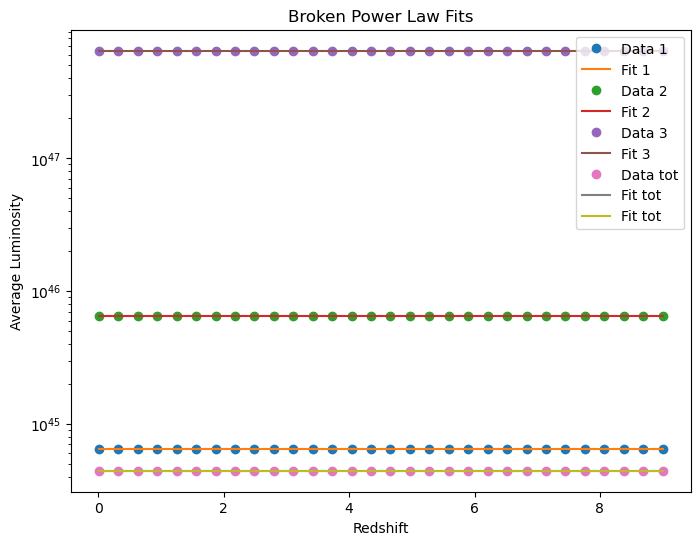

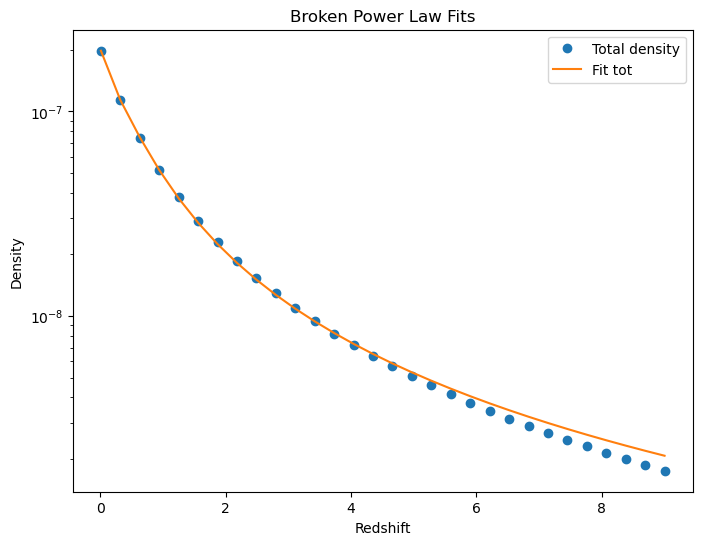

In [263]:
plt.figure(figsize=(8,6))

# Plot the first array and its fit
plt.plot(Z_list, avg_lx1, 'o', label='Data 1')
plt.plot(Z_list, broken_power_law(Z_list, *popt1), '-', label='Fit 1')

# Plot the second array and its fit
plt.plot(Z_list, avg_lx2, 'o', label='Data 2')
plt.plot(Z_list, broken_power_law(Z_list, *popt2), '-', label='Fit 2')

# Plot the third array and its fit
plt.plot(Z_list, avg_lx3, 'o', label='Data 3')
plt.plot(Z_list, broken_power_law(Z_list, *popt3), '-', label='Fit 3')

plt.plot(Z_list, avg_tot, 'o', label='Data tot')
plt.plot(Z_list, broken_power_law(Z_list, *popt_tot), '-', label='Fit tot')
z_tes_list = np.linspace(0.01,9,200)
plt.plot(z_tes_list, broken_power_law(z_tes_list, *popt_tot), '-', label='Fit tot')
print(avg_tot[0])
print(broken_power_law(Z_list[0], *popt_tot))

plt.xlabel('Redshift')
plt.ylabel('Average Luminosity')
plt.title('Broken Power Law Fits')
plt.yscale('log',base=10)

plt.legend()
plt.show()


plt.figure(figsize=(8,6))
plt.plot(Z_list, n_tot, 'o', label='Total density')
plt.plot(Z_list, broken_power_law(Z_list, *popt_tot_n), '-', label='Fit tot')
plt.xlabel('Redshift')
plt.ylabel('Density')
plt.title('Broken Power Law Fits')
plt.yscale('log',base=10)
plt.legend()
plt.show()



In [264]:


# Define the data to be written to file
data = np.hstack((np.array(Z_list).reshape(-1,1), L_x.reshape(-1,1), em_tot.reshape(-1,1), np.array(avg_tot).reshape(-1,1), (n_1+ n_2+ n_3).reshape(-1,1), (np.array(integral_results_z_1)+ np.array(integral_results_z_2)+np.array(integral_results_z_3)+ np.array(integral_results_z_4)).reshape(-1,1)))

# Define the filename based on the selected model
filename = selected_model + '.txt'

# Write the data to file
np.savetxt("model_data/"+filename, data, header='Z_list, L_x, em_tot, avg_tot, n_tot, integral_results_z_tot')


In [265]:
#Flux of neturinos, we treat them like photons that are not distrubed by their journey. 

def flux_nu(z):
    return ( broken_power_law(z, *popt_tot_em)/((cosmo1.luminosity_distance(z).value)**2)*cosmo.differential_comoving_volume(z).value)


flux_nu_tot = []

def get_flux(lowerlim, upperlim):
    a = simpsons_integration(flux_nu, lowerlim, upperlim,n=2000)
    return a


flux_tot = get_flux(0.001,10)

print(flux_tot * 624.151)



6.442844283402317e+43


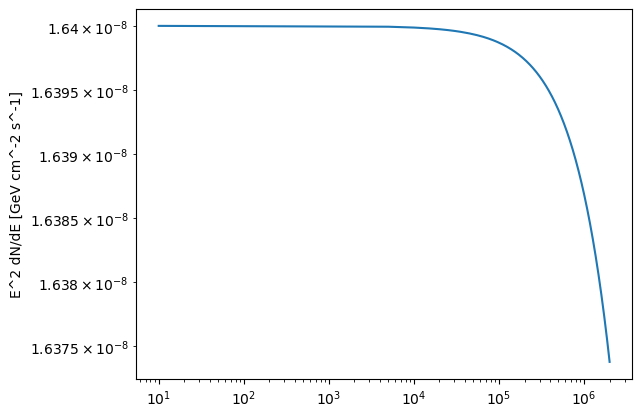

In [266]:
def ICECUBE(E_v, E_cut,gamma,phi_cut):
    return phi_cut*(E_v/100000)**(-gamma)*np.exp(-(E_v/E_cut))


E_cut = 1250000*10**3 #GeV
gamma = 2 #dimensionless
phi_cut = 1.64*10**(-18) #C units
E_v_list = np.linspace(0.01,2000,400)*(10**3) #GeV
plt.figure()
plt.plot(E_v_list,E_v_list**2*ICECUBE(E_v_list, E_cut,gamma,phi_cut))
plt.ylabel("E^2 dN/dE [GeV cm^-2 s^-1]")
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.show()

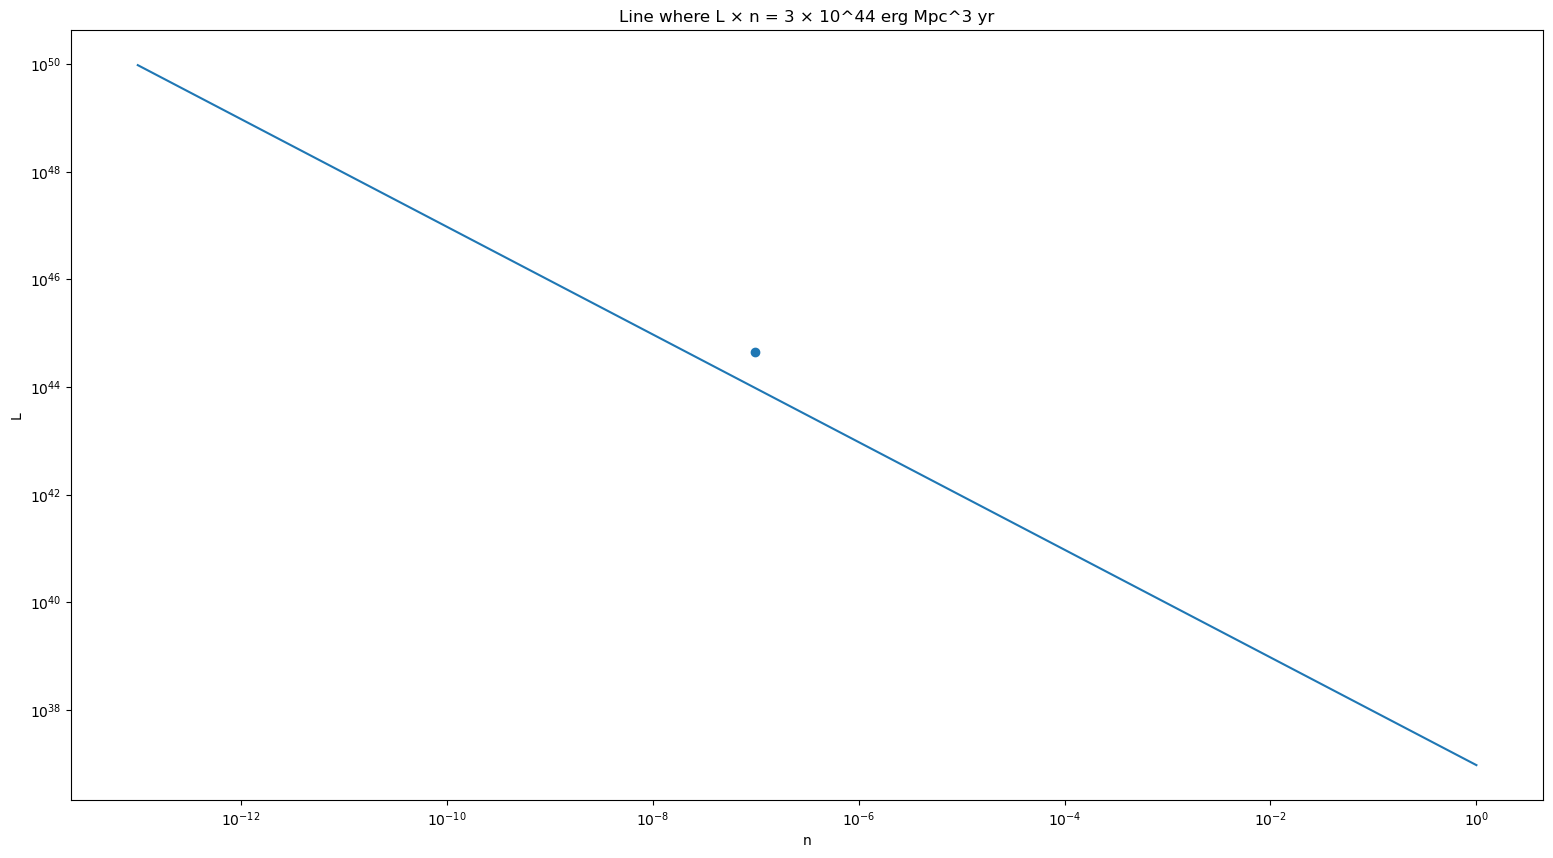

9.937939358347841e-08 4.436975889503424e+44


In [267]:

diffuse_flux_UHECR = 6*10**(17) #ev, do not know where this comes from. I dont get it. This turns into 3*10^44 ergs/s/Mpc^3 ??


# Define the value of n
n_values = np.logspace(-13, 0, 1000)

# Calculate the corresponding values of L
L_values = (3 * 10**44) / n_values/(60*60*24*365)

# Plot the line
plt.figure(1, figsize=(19,10))
plt.plot(n_values, L_values)

n_z_tot = n_z_1 + n_z_2 + n_z_3
# Add labels and title
plt.xlabel('n')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.ylabel('L')
plt.scatter(n_z_tot[0], avg_tot[0], label='Blazars')
plt.title('Line where L × n = 3 × 10^44 erg Mpc^3 yr')

# Show the plot
plt.show()
print(n_z_tot[0], avg_tot[0])

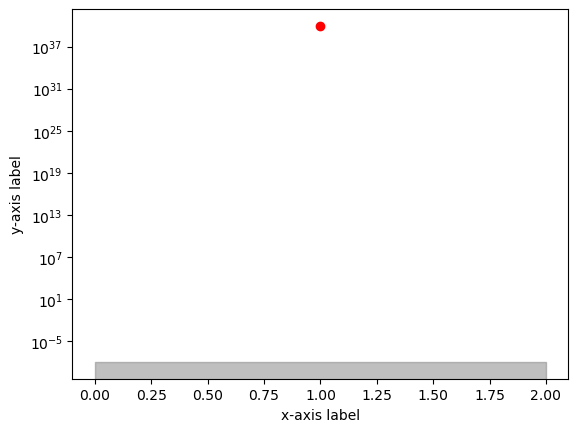

In [268]:
def flux_integrand(z):
    Dh = cosmo.hubble_distance.value  # Hubble distance in Mpc
    E_z = cosmo.efunc(z)  # E(z) function from astropy
    return (Dh / E_z) * (broken_power_law(z,*popt_tot) / (4 * np.pi * (1 + z)**2 )* broken_power_law(z, *popt_tot_n))

d_phi = []

for i in range(len(E_v_list)):
    Ev = E_v_list[i]



    results_flux = simpsons_integration(flux_integrand, 0.001, 9,n=20)

#print(results_flux/1e18)

# Plot the results_flux as a point
plt.plot(1, results_flux, 'ro')

# Grey out the area below 10^(-8)
plt.fill_between([0, 2], 0, 1e-8, color='gray', alpha=0.5)

# Set the y-axis scale to logarithmic
plt.yscale('log')

# Set the x-axis and y-axis labels
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')

# Show the plot
plt.show()


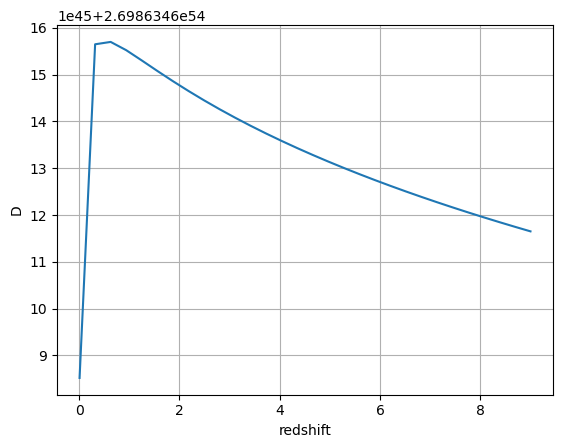

2.769338496634422e+47
4.436975889503424e+44
2.769338496634422e+47


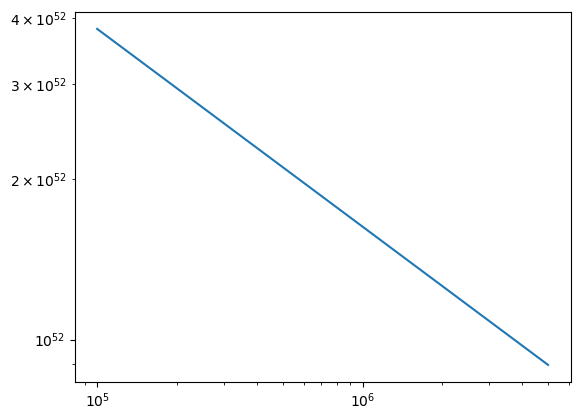

In [274]:
from scipy.optimize import minimize

def SED_neut(E_v,D): #general SED for all neutrino emmision from the tpye of AGN considered
    return D*E_v**(-2.37) #2.2 comes from some paper i think
E_v_list = np.linspace(100,5000,400)*(10**3) #GeV
E1 = E_v_list[0]
E2 = E_v_list[-1]

def integrate_SED(D): #Want this to equate the luminosity of our AGN, This luminosity is redshift dependent. 
    integral, _ = quad(SED_neut, E1, E2, args=(D))
    #print(integral)
    return integral


def objective_function(D, target_luminosity):
   
    return abs(integrate_SED(D) - target_luminosity)

#print(integrate_SED(2.829371152471951e+42))

#D_init = 2.829371152471951e+42
#z_trial = 0.01
#print(broken_power_law(z_trial, *popt_tot))
D_list = []

for i in range(len(Z_list)):
    z_trial = Z_list[i]
    D_init = broken_power_law(z_trial, *popt_tot)* 624.15 #conversion from ergs to GeV
    Neutrino_luminosity = broken_power_law(z_trial, *popt_tot)* 624.15
    result = minimize(objective_function, D_init, args=(Neutrino_luminosity),method='Nelder-Mead')
    D_list.append(result.x[0])

#result = minimize(objective_function, D_init, args=(broken_power_law(z_trial, *popt_tot)),method='Nelder-Mead')
D_list = np.array(D_list)

plt.figure()    
plt.plot(Z_list,D_list)
plt.ylabel("D")
plt.xlabel("redshift")

plt.grid()
plt.show()


# Optimal L0
#D_optimal = result.x[0]

print(integrate_SED(D_list[0]))
print(avg_tot[0])#*624.15)
print(broken_power_law(Z_list[0], *popt_tot)* 624.15)
#print(D_optimal)
plt.figure()
plt.plot(E_v_list,E_v_list**2*SED_neut(E_v_list,D_list[0]))
plt.xscale('log',base=10)
plt.yscale('log',base=10)

Fit parameters for D_list: a=5397269229472763808231403426068317463191551203518447616.00, b=0.00, c=2.53499349, d=-0.00


C:\Users\henri\AppData\Local\Temp\ipykernel_27632\505856695.py:2: RuntimeWarning: invalid value encountered in power
  return a*((z/c)**b+(z/c)**d)**(-1)


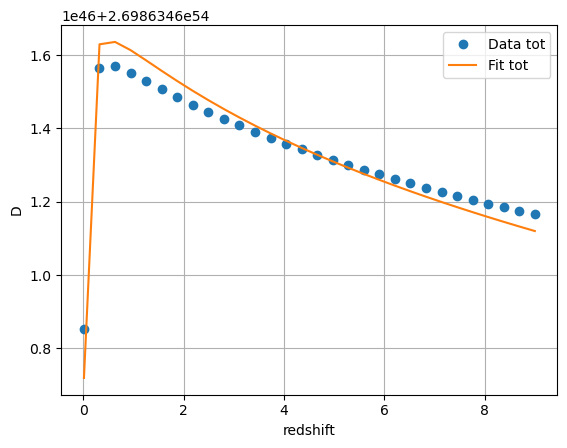

In [275]:
def D_func(z,a,b,c,d):
    return a*((z/c)**b+(z/c)**d)**(-1)

    

popt_tot_D, pcov_tot_D= curve_fit(D_func, Z_list, D_list, p0=[D_list[0], 1, 4, 1]) #c param very important and volatile
print(f"Fit parameters for D_list: a={popt_tot_D[0]:.2f}, b={popt_tot_D[1]:.2f}, c={popt_tot_D[2]:.8f}, d={popt_tot_D[3]:.2f}")


plt.figure()
plt.plot(Z_list, D_list, 'o', label='Data tot')
plt.plot(Z_list, D_func(Z_list, *popt_tot_D), '-', label='Fit tot')
plt.ylabel("D")
plt.xlabel("redshift")
plt.grid()
plt.legend()
plt.show()




In [276]:
def flux_integrand(z):
    Dh = cosmo.hubble_distance.value  # Hubble distance in Mpc
    E_z = cosmo.efunc(z)  # E(z) function from astropy
 
    return (Dh / E_z) * SED_neut(Ev*(1+z),(D_func(z,*popt_tot_D))) / (Ev**2 *4 * np.pi * (1 + z)**2 )* broken_power_law(z, *popt_tot_n)

d_phi = []

for i in range(len(E_v_list)):
    Ev = E_v_list[i]

    

    results_flux = simpsons_integration(flux_integrand, 0.001, 9,n=2000)
    d_phi.append(results_flux/(3.0857*10**24)**2) #convert from Mpc^2 to cm^2 

d_phi = np.array(d_phi)
#print(results_flux/1e18)

# Plot the results_flux as a point
#plt.plot(1, results_flux, 'ro')

# Grey out the area below 10^(-8)
#plt.fill_between([0, 2], 0, 1e-8, color='gray', alpha=0.5)

# Set the y-axis scale to logarithmic
#plt.yscale('log')

# Set the x-axis and y-axis labels
#plt.xlabel('x-axis label')
#plt.ylabel('y-axis label')

# Show the plot
#plt.show()

[4.44882035e-22 2.68170809e-22 1.70380153e-22 1.12970376e-22
 7.75992070e-23 5.49117371e-23 3.98558603e-23 2.95686405e-23
 2.23596597e-23 1.71947531e-23 1.34213353e-23 1.06162227e-23
 8.49826885e-24 6.87660838e-24 5.61912208e-24 4.63273411e-24
 3.85081885e-24 3.22498449e-24 2.71961061e-24 2.30815384e-24
 1.97060954e-24 1.69174210e-24 1.45983462e-24 1.26579423e-24
 1.10250453e-24 9.64351798e-25 8.46874705e-25 7.46503022e-25
 6.60360839e-25 5.86117188e-25 5.21871736e-25 4.66066651e-25
 4.17418190e-25 3.74863207e-25 3.37517098e-25 3.04640506e-25
 2.75612832e-25 2.49911037e-25 2.27092591e-25 2.06781686e-25
 1.88658041e-25 1.72447775e-25 1.57915911e-25 1.44860227e-25
 1.33106165e-25 1.22502610e-25 1.12918380e-25 1.04239295e-25
 9.63657139e-26 8.92104698e-26 8.26971266e-26 7.67585032e-26
 7.13354211e-26 6.63756394e-26 6.18329455e-26 5.76663776e-26
 5.38395570e-26 5.03201151e-26 4.70791982e-26 4.40910406e-26
 4.13325949e-26 3.87832105e-26 3.64243548e-26 3.42393696e-26
 3.22132591e-26 3.033250

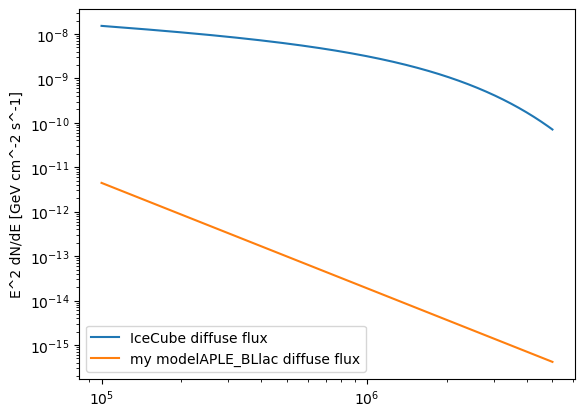

47812.81425499704


In [277]:
def ICECUBE(E_v, E_cut,gamma,phi_cut):
    return phi_cut*(E_v/100000)**(-gamma)*np.exp(-(E_v/E_cut))

print(d_phi)
E_cut = 1250000 #GeV
gamma = 2.37 #dimensionless
phi_cut = 1.64*10**(-18) #C units
#E_v_list = np.linspace(0.01,2000,400)*(10**3) #GeV
plt.figure()
plt.plot(E_v_list,E_v_list**2*ICECUBE(E_v_list, E_cut,gamma,phi_cut),label = "IceCube diffuse flux")
plt.plot(E_v_list,E_v_list**2*d_phi,label = "my model"+selected_model + " diffuse flux")
plt.ylabel("E^2 dN/dE [GeV cm^-2 s^-1]")
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.legend()
plt.show()

print(cosmo.luminosity_distance(5).value)
